<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysisPt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS 3**

## **0 Inizializzazione**

In [26]:
import networkx as nx
import pandas as pd
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community.label_propagation import label_propagation_communities
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [4]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [5]:
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]

def get_common_neighbor_subgraph(graph, source, target):
    nodes = [source, target] + list(nx.common_neighbors(G, source, target))
    return graph.subgraph(nodes)

In [7]:
girvan_newman_communities = list(girvan_newman(G))

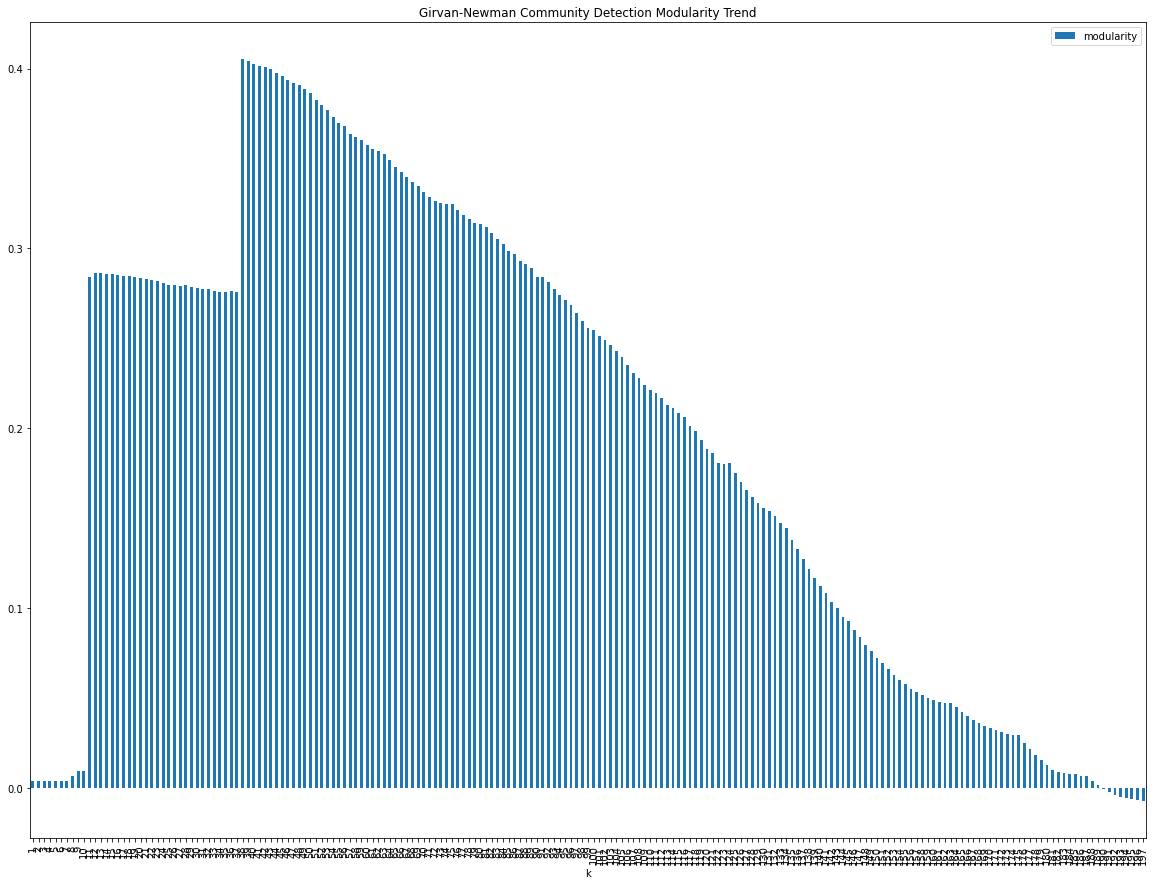

In [13]:
modularity_df = pd.DataFrame([[k+1, round(nx_comm.modularity(G, girvan_newman_communities[k]), 6)]
                for k in range(len(girvan_newman_communities))], columns=["k", "modularity"])
modularity_df.plot.bar(x="k", figsize=(15,10), title="Girvan-Newman Community Detection Modularity Trend")

In [14]:
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [18]:
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.figure(1,figsize=(20,10)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

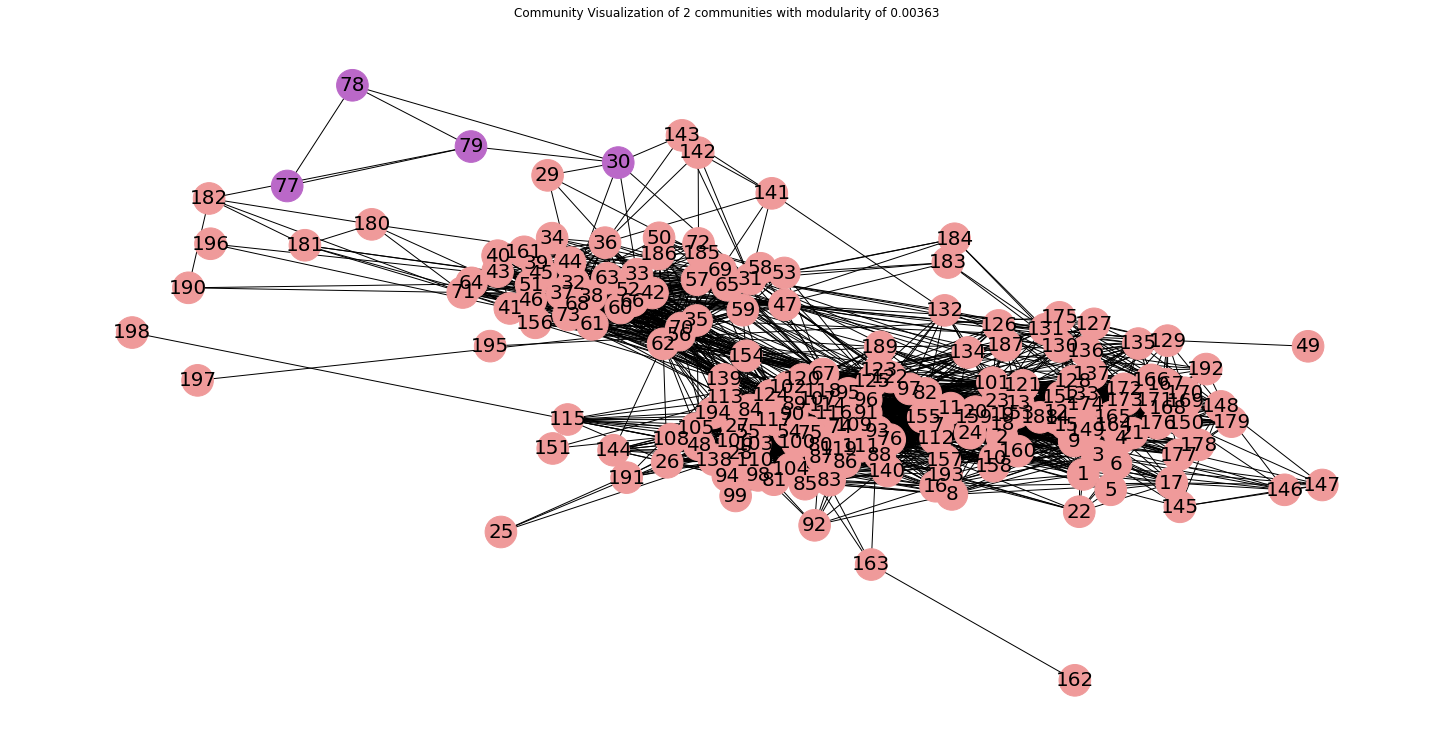

In [19]:
visualize_communities(G, girvan_newman_communities[0])

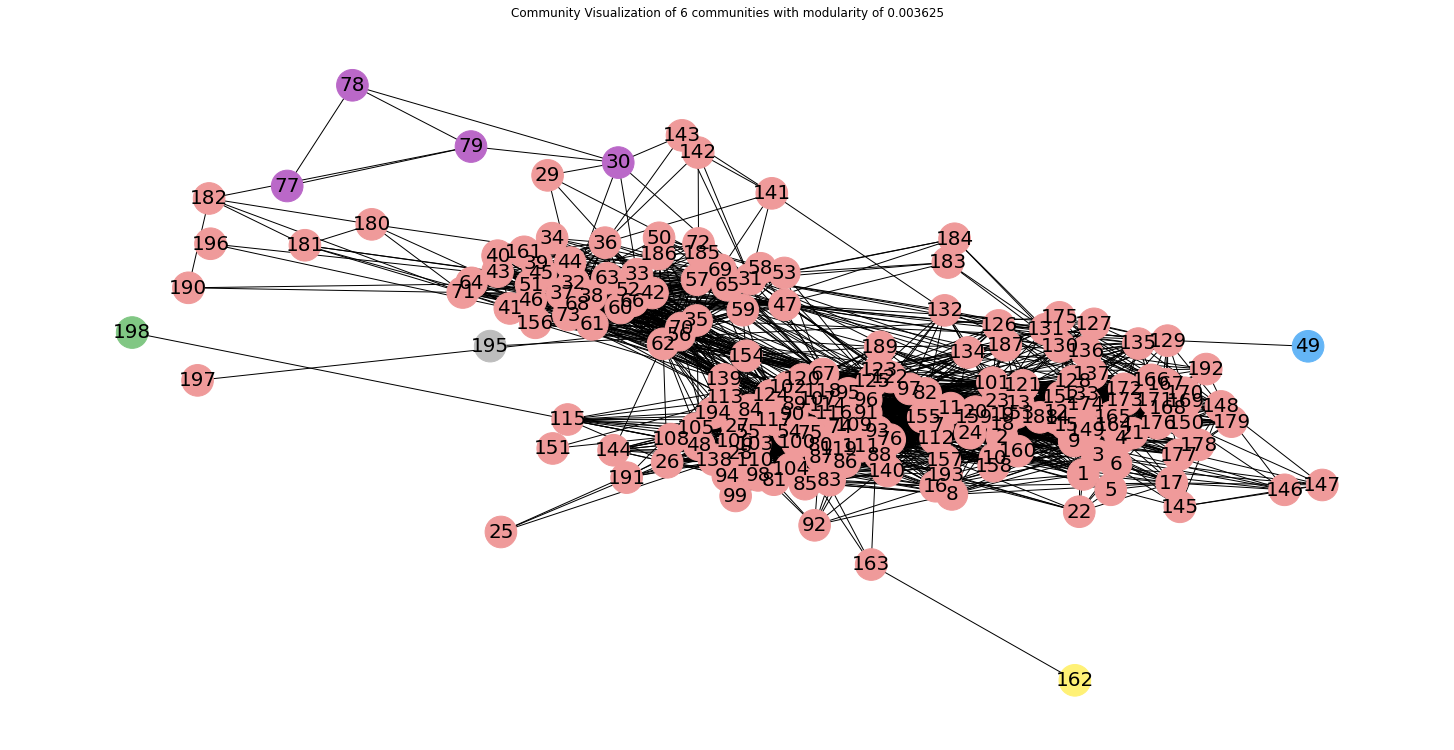

In [25]:
visualize_communities(G, girvan_newman_communities[4])

In [27]:
label_prop_communities = list(label_propagation_communities(G))
label_prop_communities

[{'1',
  '10',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '11',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '12',
  '120',
  '121',
  '122',
  '123',
  '124',
  '125',
  '126',
  '127',
  '128',
  '129',
  '13',
  '130',
  '131',
  '132',
  '133',
  '134',
  '135',
  '136',
  '137',
  '138',
  '139',
  '14',
  '140',
  '144',
  '145',
  '146',
  '147',
  '148',
  '149',
  '15',
  '150',
  '151',
  '152',
  '153',
  '154',
  '155',
  '157',
  '158',
  '159',
  '16',
  '160',
  '162',
  '163',
  '164',
  '165',
  '166',
  '167',
  '168',
  '169',
  '17',
  '170',
  '171',
  '172',
  '173',
  '174',
  '175',
  '176',
  '177',
  '178',
  '179',
  '18',
  '187',
  '188',
  '189',
  '19',
  '191',
  '192',
  '193',
  '194',
  '195',
  '198',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '3',
  '4',
  '48',
  '5',
  '54',
  '55',
  '6',
  '67',
  '7',
  '74',
  '

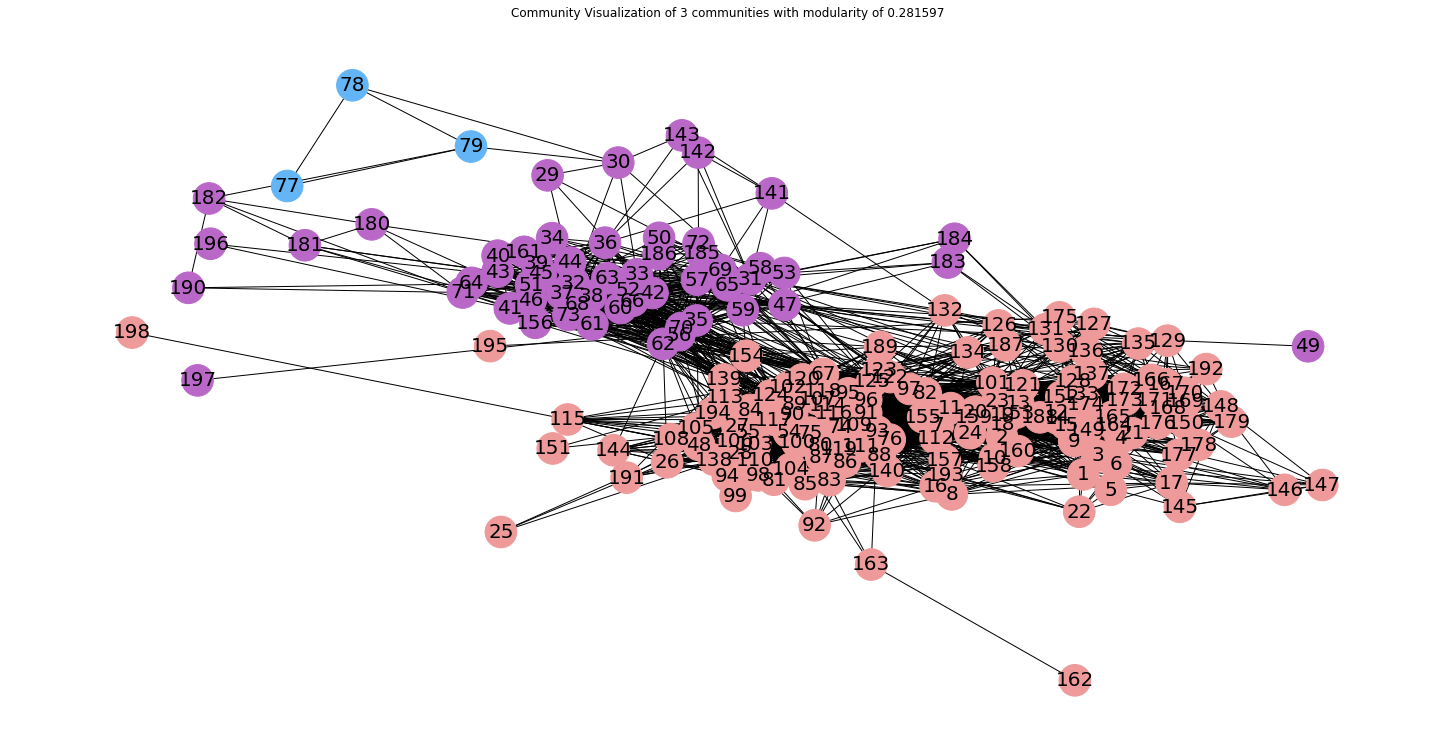

In [28]:
visualize_communities(G, label_prop_communities)

In [29]:
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Community Partition Subgraph"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

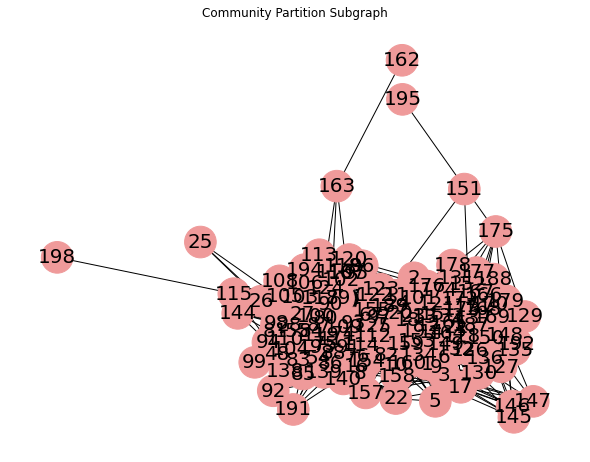

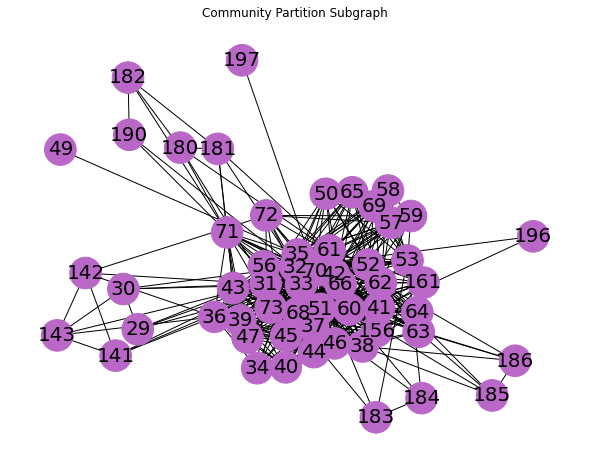

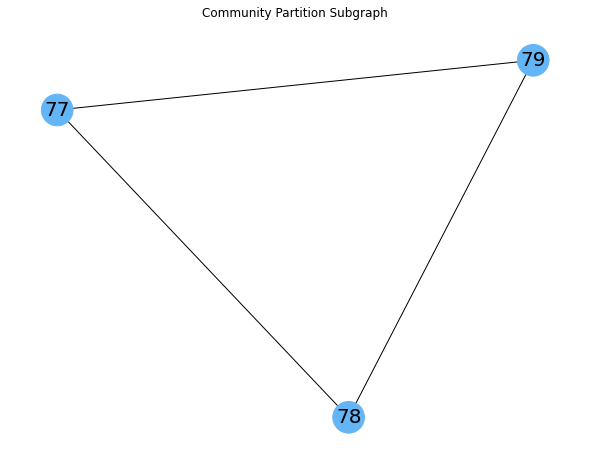

In [30]:
colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784", "#FFF176", "#BDBDBD"]
for i in range(len(label_prop_communities)):
    visualize_subgraph(G, label_prop_communities[i], colors[i])